**<font size=6> Data preparation<font size=6>**

In [1]:
# env: UD_RM
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt

from subroutine.wavefieldsepforp import wavefield_sepforp
from subroutine.wavefieldsep import wavefield_separation

**<font size=5>wavefield sepration for q data<font size=5>**

In [2]:
# parameters
inputfile = '/home/wangn0e/2022-2023/first_research/dataset/originaldata_simple.npz'
inputdata = np.load(inputfile)

# Receivers
r = inputdata['r']
dr = r[0, 1]-r[0, 0]
nr = r.shape[1]

# Sources
s = inputdata['s']
ds = s[0, 1]-s[0, 0]
ns = s.shape[1]

# models
rho = inputdata['rho']
vel = inputdata['vel']

# Time axis
t = inputdata['t']
ot, dt, nt = t[0], t[1]-t[0], len(t)

# Axes
x, z = inputdata['x'], inputdata['z']
dx, dz = x[1] - x[0], z[1] - z[0]

# Wavelet
wav = inputdata['wav']
wav = wav / np.max(np.abs(np.fft.fft(wav))*dt) 
wav_c = np.argmax(wav)

# pressure and velocities
p_q   = inputdata['p_q']         # organized as (S, R, T)
vz_q  = inputdata['vz_q']        # organized as (S, R, T)(201, 201, 1081)
p_fz  = inputdata['p_fz']        # organized as (S, R, T)
vz_fz = inputdata['vz_fz']       # organized as (S, R, T)(201, 201, 1081)


**<font size=5>q data separated at source side, data should be organized as (nr,ns,nt)<font size=5>**

In [3]:
# pressure and velocities
p_q   = p_q.transpose(1, 0, 2)          # (S, R, T)->(R, S, T)
vz_q  = vz_q.transpose(1, 0, 2)         # (S, R, T)->(R, S, T)
p_fz  = p_fz.transpose(1, 0, 2)         # (S, R, T)->(R, S, T)
vz_fz = vz_fz.transpose(1, 0, 2)        # (S, R, T)->(R, S, T)

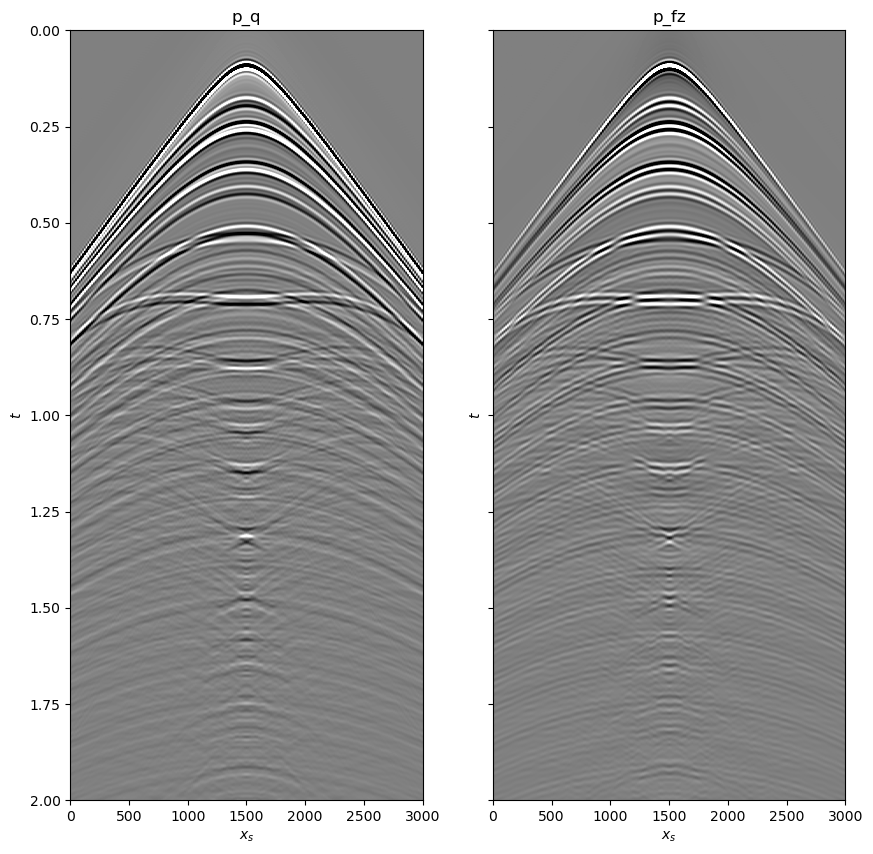

In [4]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(10, 10))
axs[0].imshow(p_q[nr//2].T, cmap='gray', vmin=-0.1*np.abs(p_q).max(), 
              vmax=0.1*np.abs(p_q).max(), extent=(s[0,0], s[0,-1], t[-1], t[0]))
axs[0].set_title('p_q'), axs[0].set_xlabel(r'$x_s$'), axs[0].set_ylabel(r'$t$')
axs[0].axis('tight')
axs[1].imshow(p_fz[nr//2].T, cmap='gray', vmin=-0.1*np.abs(p_fz).max(), 
              vmax=0.1*np.abs(p_fz).max(), extent=(s[0,0], s[0,-1], t[-1], t[0]))
axs[1].set_title('p_fz'), axs[1].set_xlabel(r'$x_s$'), axs[1].set_ylabel(r'$t$')
axs[1].axis('tight')
axs[1].set_ylim(2,0);

Working with source 0
Working with source 1
Working with source 2
Working with source 3
Working with source 4
Working with source 5
Working with source 6
Working with source 7
Working with source 8
Working with source 9
Working with source 10
Working with source 11
Working with source 12
Working with source 13
Working with source 14
Working with source 15
Working with source 16
Working with source 17
Working with source 18
Working with source 19
Working with source 20
Working with source 21
Working with source 22
Working with source 23
Working with source 24
Working with source 25
Working with source 26
Working with source 27
Working with source 28
Working with source 29
Working with source 30
Working with source 31
Working with source 32
Working with source 33
Working with source 34
Working with source 35
Working with source 36
Working with source 37
Working with source 38
Working with source 39
Working with source 40
Working with source 41
Working with source 42
Working with source 4

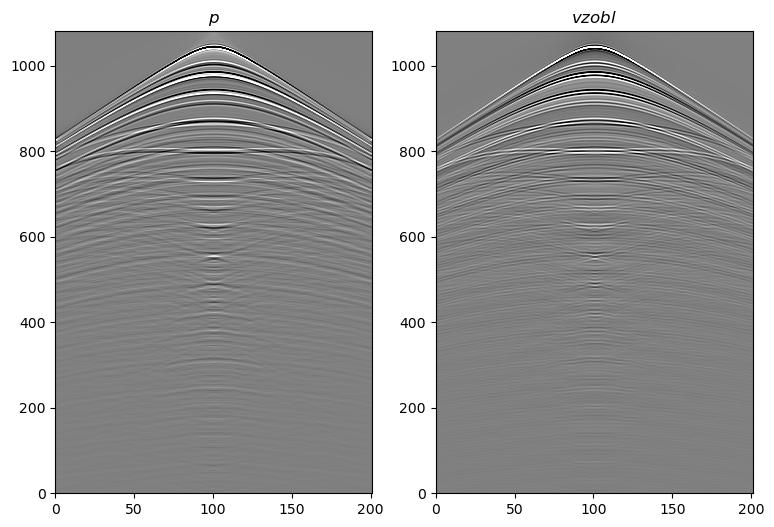

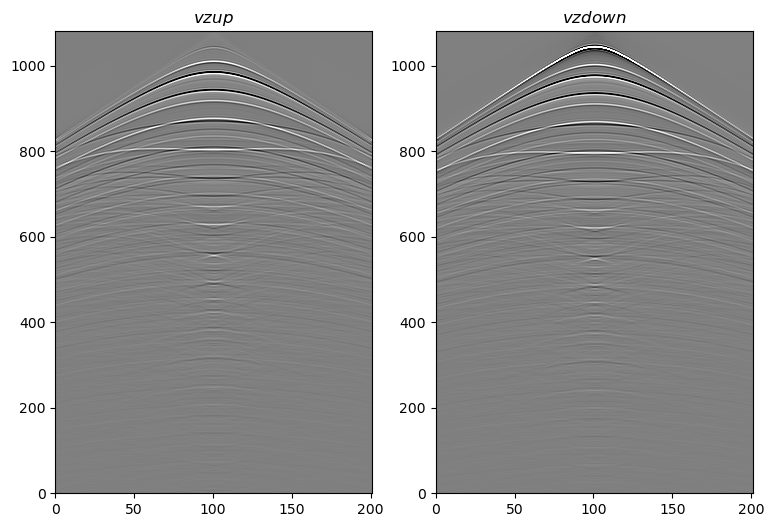

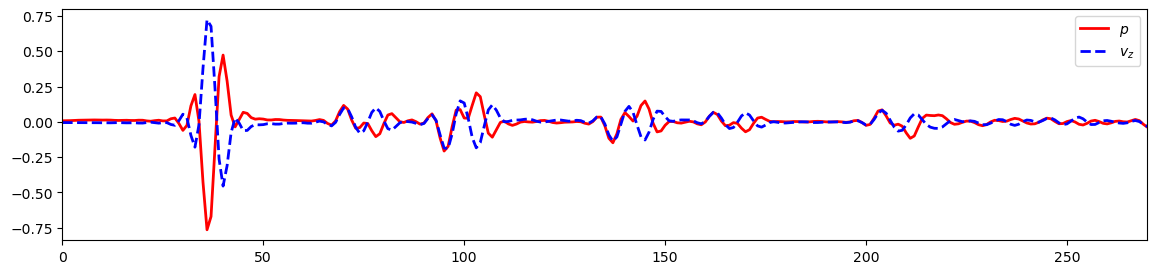

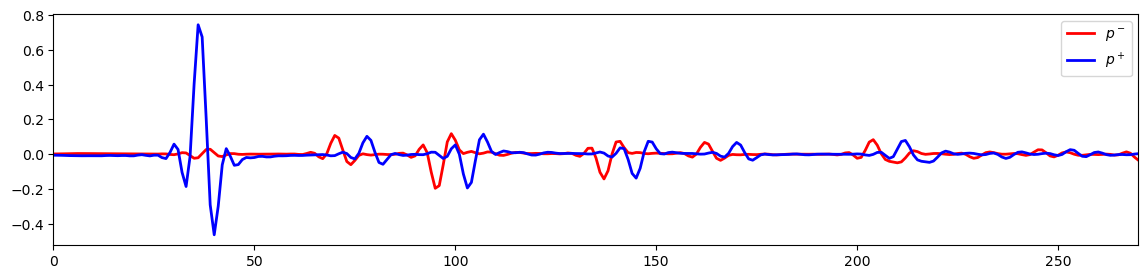

In [5]:
# wavefield seprate
rho_sep = 1000      # density at sources
vel_sep = 2400.0    # velocity at sources
nffts = (2**11, 2**11)
pup_fz, pdown_fz =wavefield_separation(p_q, p_fz, dt, dr, rho_sep, vel_sep, nffts=nffts,
                                       critical=110, ntaper=10, verb=True, plotflag=True)

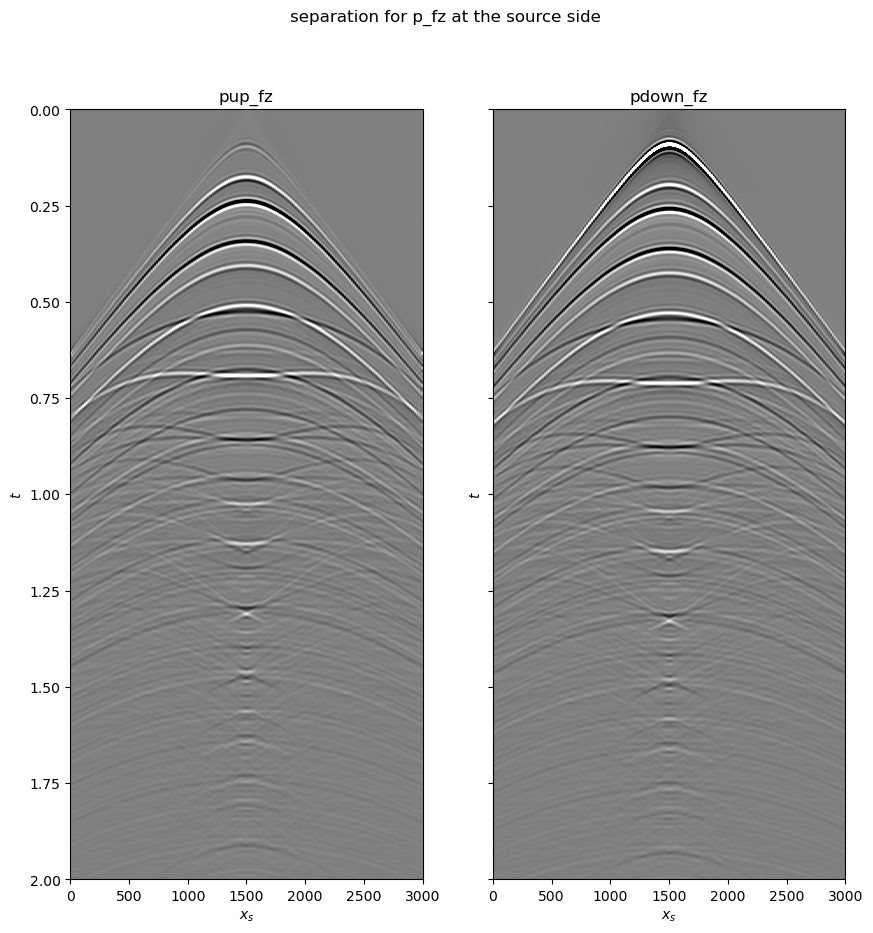

In [6]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(10, 10))
fig.suptitle('separation for p_fz at the source side')
axs[0].imshow(pup_fz[nr//2].T, cmap='gray', vmin=-0.1*np.abs(pup_fz+pdown_fz).max(), 
              vmax=0.1*np.abs(pup_fz+pdown_fz).max(), extent=(s[0,0], s[0,-1], t[-1], t[0]))
axs[0].set_title('pup_fz'), axs[0].set_xlabel(r'$x_s$'), axs[0].set_ylabel(r'$t$')
axs[0].axis('tight')
axs[1].imshow(pdown_fz[nr//2].T, cmap='gray', vmin=-0.1*np.abs(pup_fz+pdown_fz).max(), 
              vmax=0.1*np.abs(pup_fz+pdown_fz).max(), extent=(s[0,0], s[0,-1], t[-1], t[0]))
axs[1].set_title('pdown_fz'), axs[1].set_xlabel(r'$x_s$'), axs[1].set_ylabel(r'$t$')
axs[1].axis('tight')
axs[1].set_ylim(2,0);

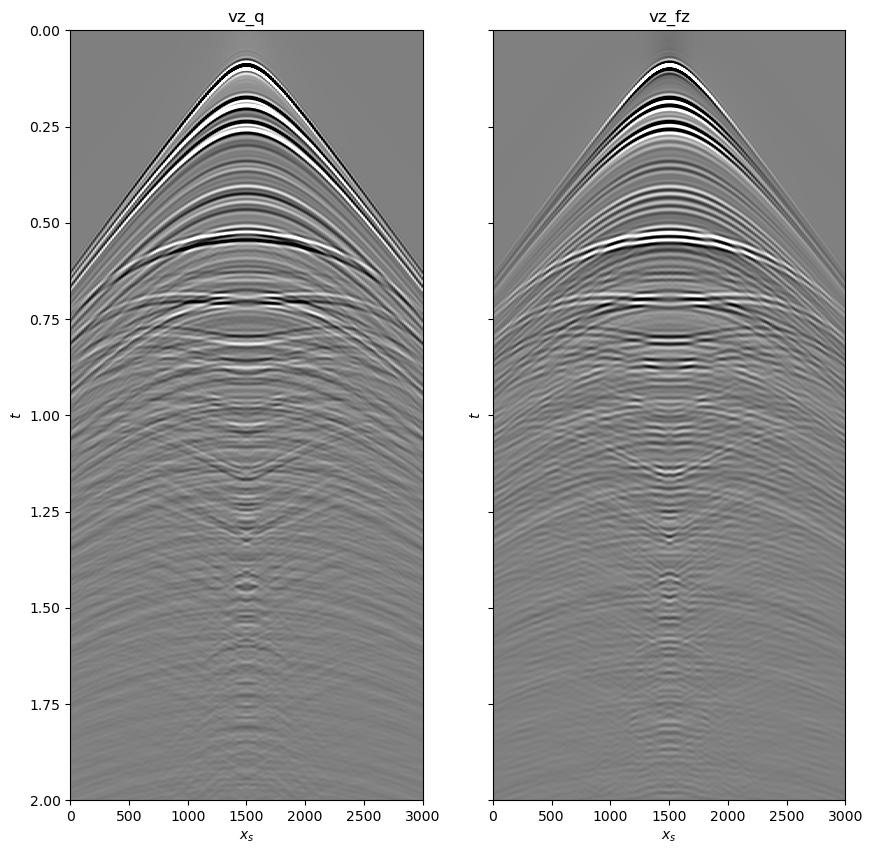

In [7]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(10, 10))
axs[0].imshow(vz_q[nr//2].T, cmap='gray', vmin=-0.1*np.abs(vz_q).max(), 
              vmax=0.1*np.abs(vz_q).max(), extent=(s[0,0], s[0,-1], t[-1], t[0]))
axs[0].set_title('vz_q'), axs[0].set_xlabel(r'$x_s$'), axs[0].set_ylabel(r'$t$')
axs[0].axis('tight')
axs[1].imshow(vz_fz[nr//2].T, cmap='gray', vmin=-0.1*np.abs(vz_fz).max(), 
              vmax=0.1*np.abs(vz_fz).max(), extent=(s[0,0], s[0,-1], t[-1], t[0]))
axs[1].set_title('vz_fz'), axs[1].set_xlabel(r'$x_s$'), axs[1].set_ylabel(r'$t$')
axs[1].axis('tight')
axs[1].set_ylim(2,0);

Working with source 0
Working with source 1
Working with source 2
Working with source 3
Working with source 4
Working with source 5
Working with source 6
Working with source 7
Working with source 8
Working with source 9
Working with source 10
Working with source 11
Working with source 12
Working with source 13
Working with source 14
Working with source 15
Working with source 16
Working with source 17
Working with source 18
Working with source 19
Working with source 20
Working with source 21
Working with source 22
Working with source 23
Working with source 24
Working with source 25
Working with source 26
Working with source 27
Working with source 28
Working with source 29
Working with source 30
Working with source 31
Working with source 32
Working with source 33
Working with source 34
Working with source 35
Working with source 36
Working with source 37
Working with source 38
Working with source 39
Working with source 40
Working with source 41
Working with source 42
Working with source 4

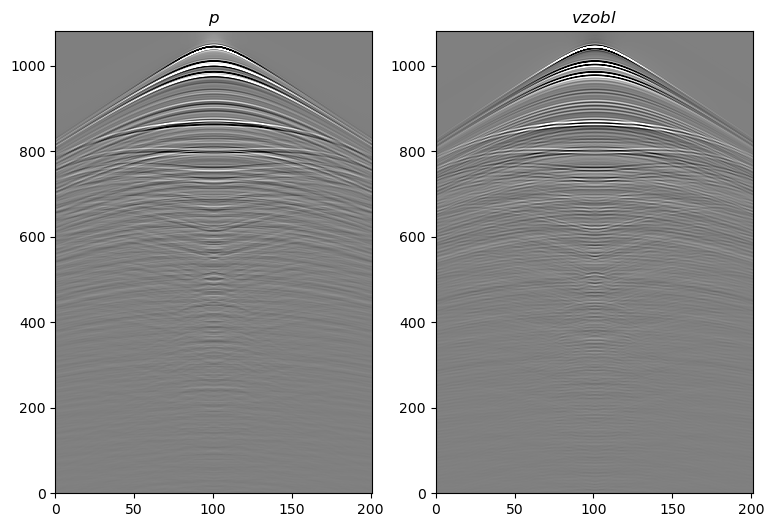

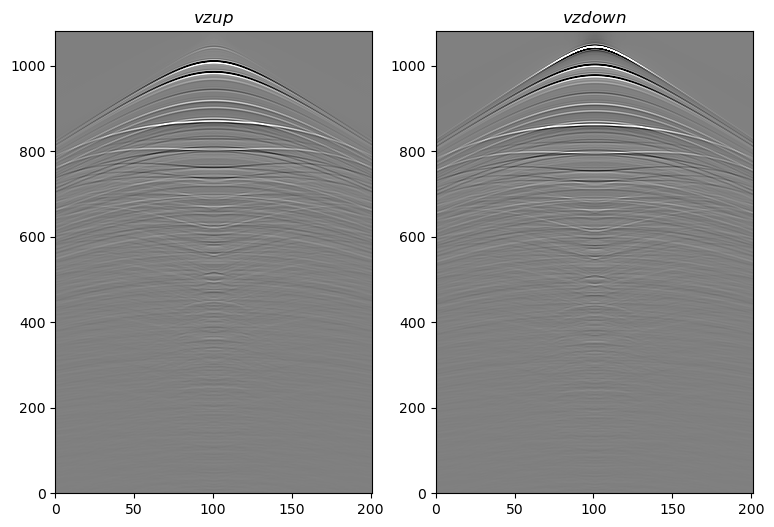

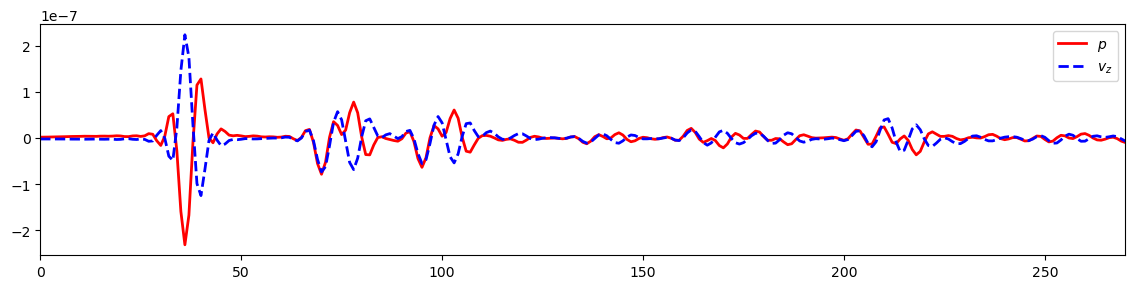

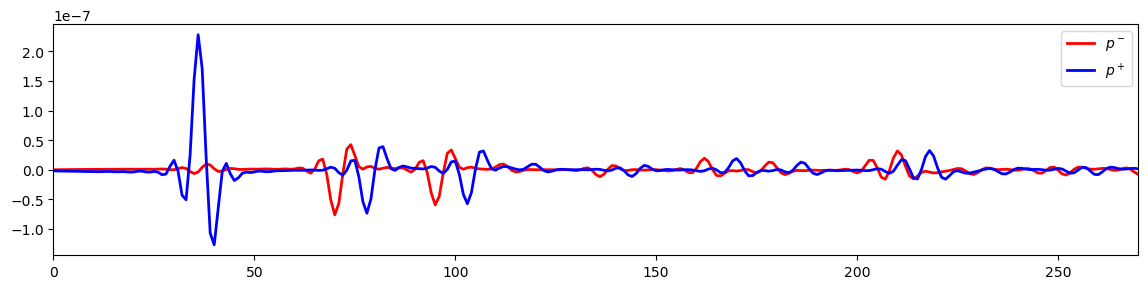

In [8]:
# wavefield seprate
vzup_fz, vzdown_fz =wavefield_separation(vz_q, vz_fz, dt, dr, rho_sep, vel_sep, nffts=nffts,
                                       critical=110, ntaper=10, verb=True, plotflag=True)

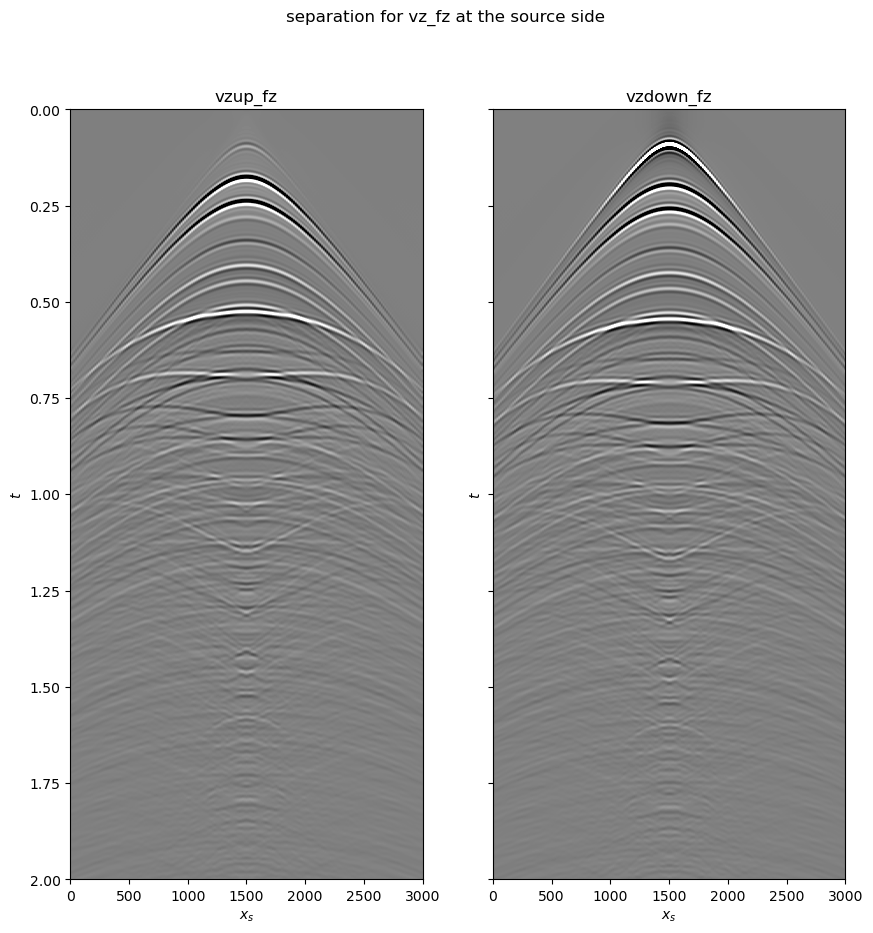

In [9]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(10, 10))
fig.suptitle('separation for vz_fz at the source side')
axs[0].imshow(vzup_fz[nr//2].T, cmap='gray', vmin=-0.1*np.abs(vzdown_fz+vzup_fz).max(), 
              vmax=0.1*np.abs(vzdown_fz+vzup_fz).max(), extent=(s[0,0], s[0,-1], t[-1], t[0]))
axs[0].set_title('vzup_fz'), axs[0].set_xlabel(r'$x_s$'), axs[0].set_ylabel(r'$t$')
axs[0].axis('tight')
axs[1].imshow(vzdown_fz[nr//2].T, cmap='gray', vmin=-0.1*np.abs(vzdown_fz+vzup_fz).max(), 
              vmax=0.1*np.abs(vzdown_fz+vzup_fz).max(), extent=(s[0,0], s[0,-1], t[-1], t[0]))
axs[1].set_title('vzdown_fz'), axs[1].set_xlabel(r'$x_s$'), axs[1].set_ylabel(r'$t$')
axs[1].axis('tight')
axs[1].set_ylim(2,0);

**<font size=5>wavefield sepration at the receiver side for downgoing data<font size=5>**

In [10]:
# change common receiver gather into common shot gather
vup_s    = vzup_fz.transpose(1, 0, 2)            # organized as  (R, S, T),need to be (S, R, T)
vdown_s  = vzdown_fz.transpose(1, 0, 2)          # organized as  (R, S, T),need to be (S, R, T)
pup_s    = pup_fz.transpose(1, 0, 2)             # organized as  (R, S, T),need to be (S, R, T)
pdown_s  = pdown_fz.transpose(1, 0, 2)           # organized as  (R, S, T),need to be (S, R, T)


Working with source 0
Working with source 1
Working with source 2
Working with source 3
Working with source 4
Working with source 5
Working with source 6
Working with source 7
Working with source 8
Working with source 9
Working with source 10
Working with source 11
Working with source 12
Working with source 13
Working with source 14
Working with source 15
Working with source 16
Working with source 17
Working with source 18
Working with source 19
Working with source 20
Working with source 21
Working with source 22
Working with source 23
Working with source 24
Working with source 25
Working with source 26
Working with source 27
Working with source 28
Working with source 29
Working with source 30
Working with source 31
Working with source 32
Working with source 33
Working with source 34
Working with source 35
Working with source 36
Working with source 37
Working with source 38
Working with source 39
Working with source 40
Working with source 41
Working with source 42
Working with source 4

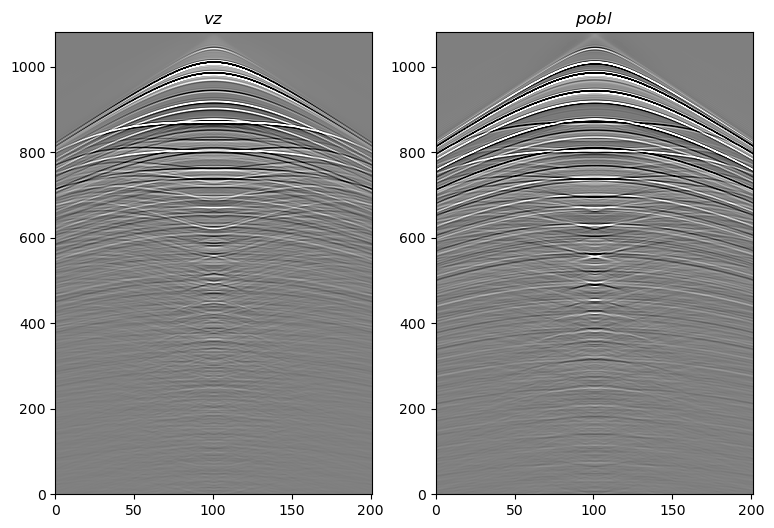

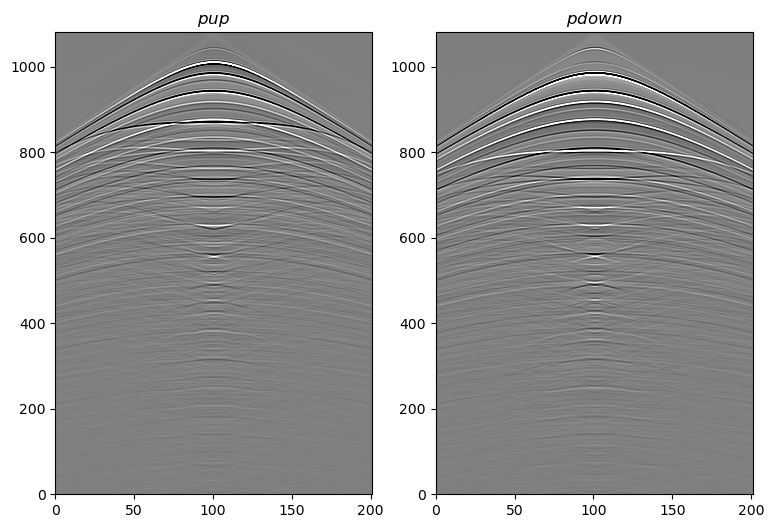

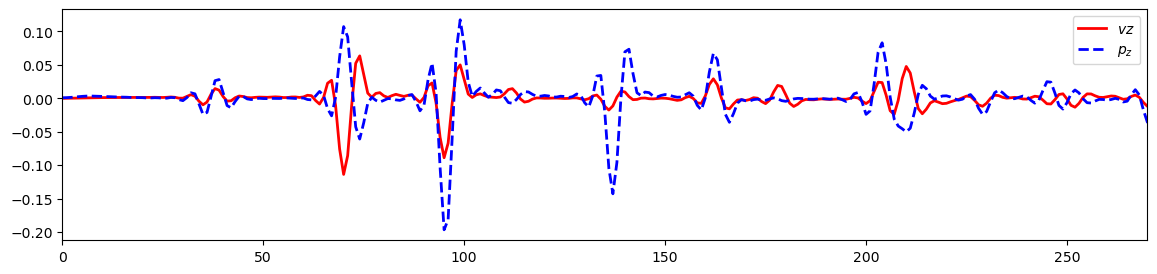

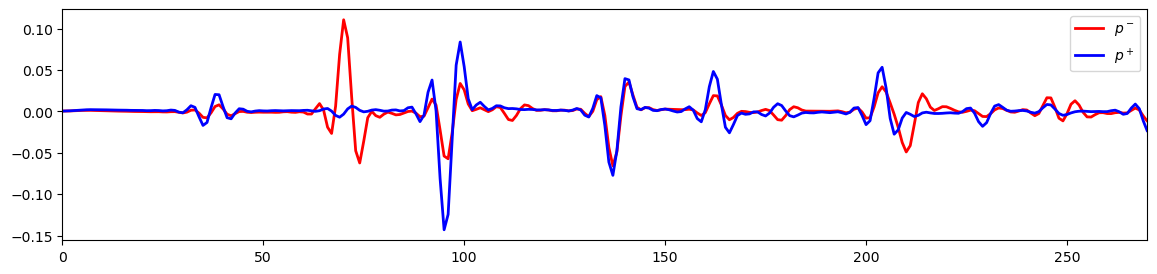

In [11]:
prup_sup, prdown_sup =wavefield_sepforp(vup_s, pup_s, dt, dr, rho_sep/1.6, vel_sep, nffts=nffts,
                                       critical=110, ntaper=10, verb=True, plotflag=True)


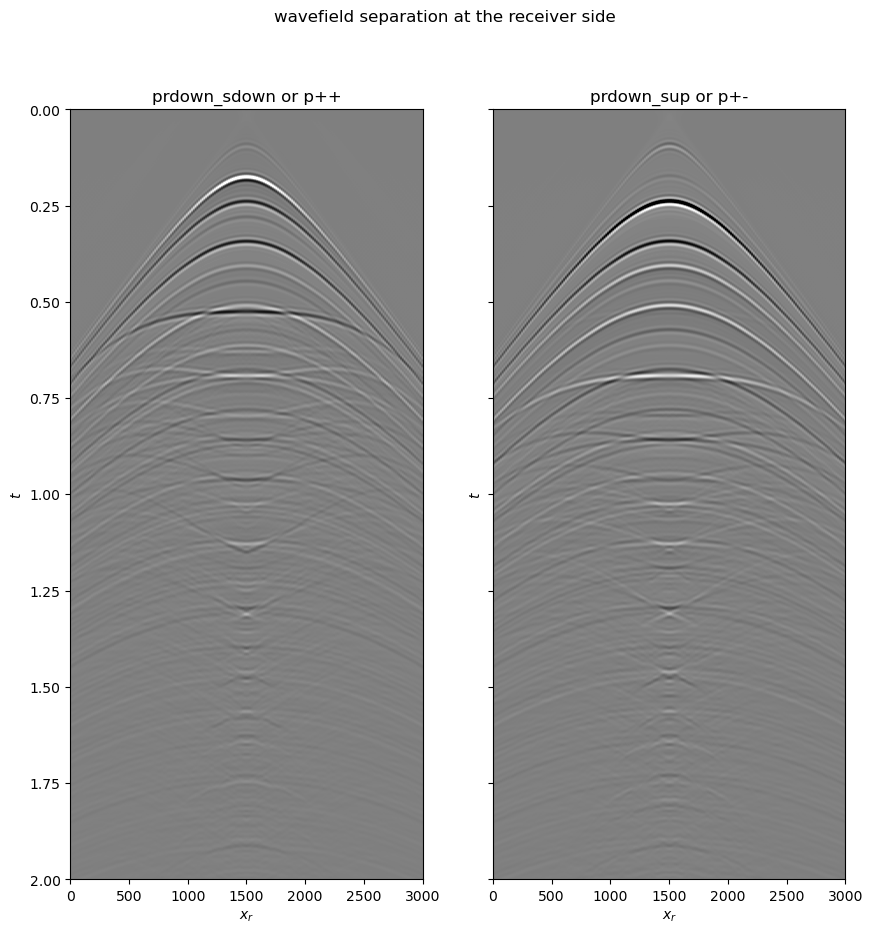

In [12]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(10, 10))
fig.suptitle('wavefield separation at the receiver side')
axs[0].imshow(prup_sup[ns//2].T, cmap='gray', vmin=-0.1*np.abs(pup_fz+pdown_fz).max(), 
              vmax=0.1*np.abs(pup_fz+pdown_fz).max(), extent=(s[0,0], s[0,-1], t[-1], t[0]))
axs[0].set_title('prdown_sdown or p++'), axs[0].set_xlabel(r'$x_r$'), axs[0].set_ylabel(r'$t$')
axs[0].axis('tight')
axs[1].imshow(prdown_sup[ns//2].T, cmap='gray', vmin=-0.1*np.abs(pup_fz+pdown_fz).max(), 
              vmax=0.1*np.abs(pup_fz+pdown_fz).max(), extent=(s[0,0], s[0,-1], t[-1], t[0]))
axs[1].set_title('prdown_sup or p+-'), axs[1].set_xlabel(r'$x_r$'), axs[1].set_ylabel(r'$t$')
axs[1].axis('tight')
axs[1].set_ylim(2,0);

Working with source 0
Working with source 1
Working with source 2
Working with source 3
Working with source 4
Working with source 5
Working with source 6
Working with source 7
Working with source 8
Working with source 9
Working with source 10
Working with source 11
Working with source 12
Working with source 13
Working with source 14
Working with source 15
Working with source 16
Working with source 17
Working with source 18
Working with source 19
Working with source 20
Working with source 21
Working with source 22
Working with source 23
Working with source 24
Working with source 25
Working with source 26
Working with source 27
Working with source 28
Working with source 29
Working with source 30
Working with source 31
Working with source 32
Working with source 33
Working with source 34
Working with source 35
Working with source 36
Working with source 37
Working with source 38
Working with source 39
Working with source 40
Working with source 41
Working with source 42
Working with source 4

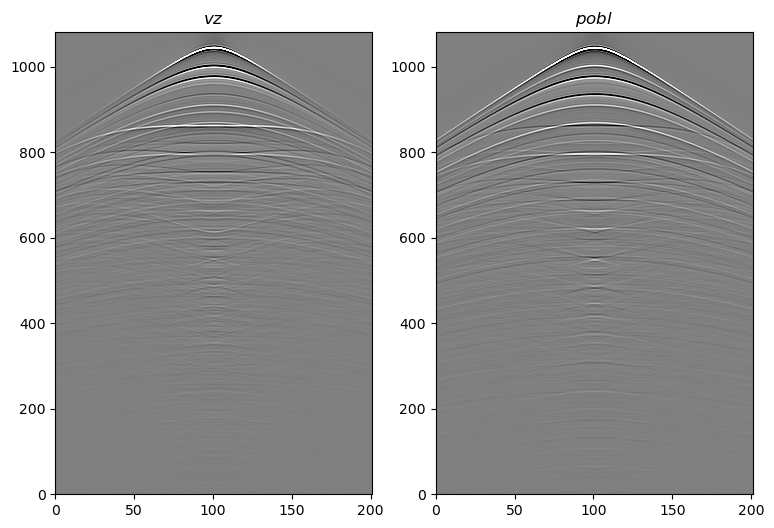

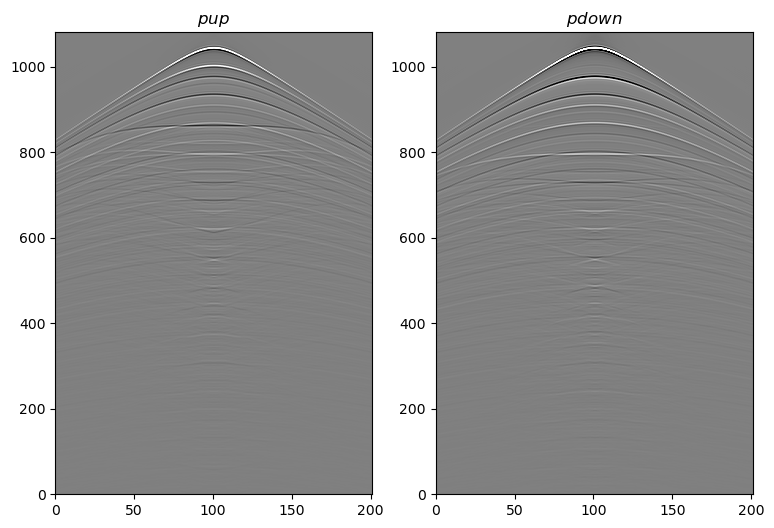

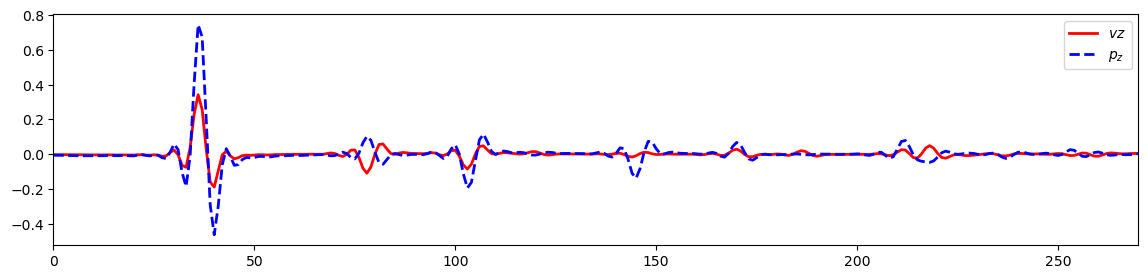

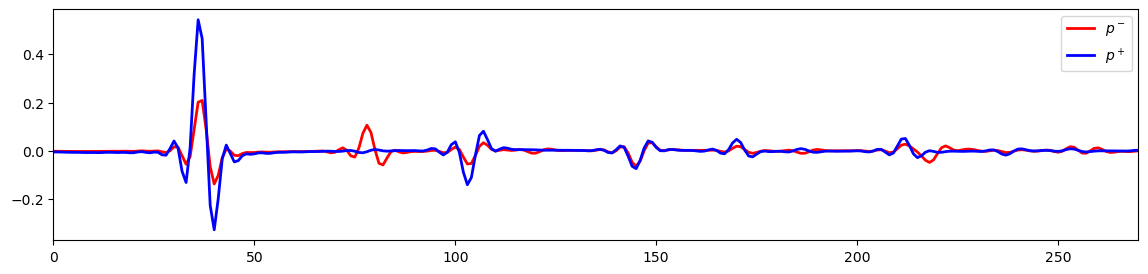

In [13]:
prup_sdown, prdown_sdown =wavefield_sepforp(vdown_s, pdown_s, dt, dr, rho_sep/1.6, vel_sep, nffts=nffts,
                                       critical=110, ntaper=10, verb=True, plotflag=True)

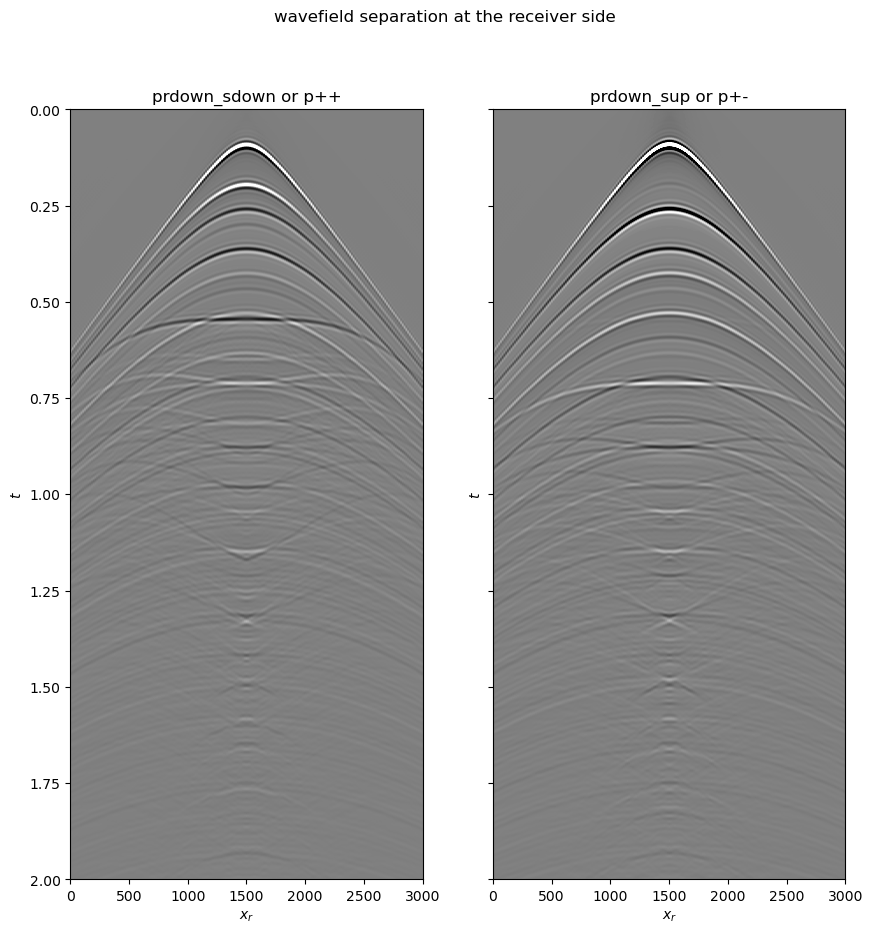

In [14]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(10, 10))
fig.suptitle('wavefield separation at the receiver side')
axs[0].imshow(prup_sdown[ns//2].T, cmap='gray', vmin=-0.1*np.abs(pup_fz+pdown_fz).max(), 
              vmax=0.1*np.abs(pup_fz+pdown_fz).max(), extent=(s[0,0], s[0,-1], t[-1], t[0]))
axs[0].set_title('prdown_sdown or p++'), axs[0].set_xlabel(r'$x_r$'), axs[0].set_ylabel(r'$t$')
axs[0].axis('tight')
axs[1].imshow(prdown_sdown[ns//2].T, cmap='gray', vmin=-0.1*np.abs(pup_fz+pdown_fz).max(), 
              vmax=0.1*np.abs(pup_fz+pdown_fz).max(), extent=(s[0,0], s[0,-1], t[-1], t[0]))
axs[1].set_title('prdown_sup or p+-'), axs[1].set_xlabel(r'$x_r$'), axs[1].set_ylabel(r'$t$')
axs[1].axis('tight')
axs[1].set_ylim(2,0);

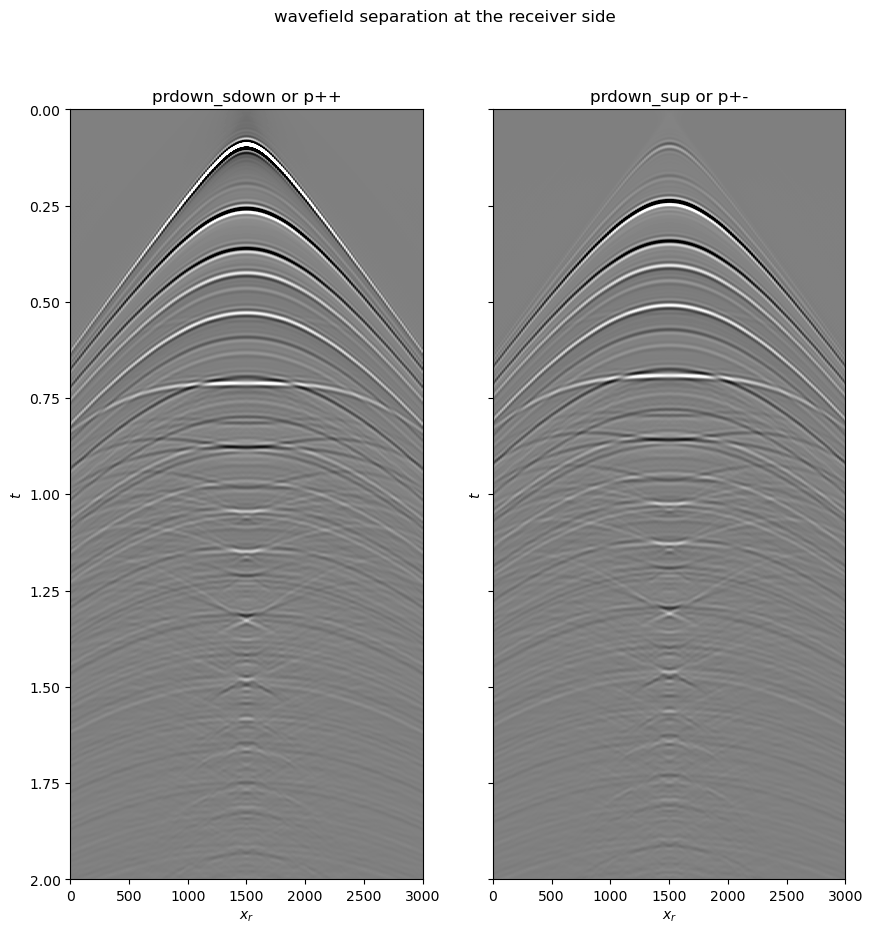

In [15]:
# After RESULTS
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(10, 10))
fig.suptitle('wavefield separation at the receiver side')
axs[0].imshow(prdown_sdown[ns//2].T, cmap='gray', vmin=-0.1*np.abs(prdown_sdown+prdown_sup).max(), 
              vmax=0.1*np.abs(prdown_sdown+prdown_sup).max(), extent=(s[0,0], s[0,-1], t[-1], t[0]))
axs[0].set_title('prdown_sdown or p++'), axs[0].set_xlabel(r'$x_r$'), axs[0].set_ylabel(r'$t$')
axs[0].axis('tight')
axs[1].imshow(prdown_sup[ns//2].T, cmap='gray', vmin=-0.1*np.abs(prdown_sdown+prdown_sup).max(), 
              vmax=0.1*np.abs(prdown_sdown+prdown_sup).max(), extent=(s[0,0], s[0,-1], t[-1], t[0]))
axs[1].set_title('prdown_sup or p+-'), axs[1].set_xlabel(r'$x_r$'), axs[1].set_ylabel(r'$t$')
axs[1].axis('tight')
axs[1].set_ylim(2,0);

In [18]:
# window to remove the direct wave
toff = 0.04          # direct arrival time shift 0.05
nsmooth = 10         # time window smoothing 10

# Direct arrival traveltimes
directSr = np.zeros((nr, ns),dtype = float)
for i in range(0, ns):
    directSr[i,:] = np.sqrt((r[0,i]-s[0])**2+(r[1,i]-s[1])**2)/vel_sep

directSr_rd = directSr + toff

idirectSr_rd = np.round(directSr_rd/dt).astype(np.int)
wrs_rd = np.ones((nr, ns, nt+1))

for inr in range(nr):
    for ins in range(ns):
        wrs_rd[inr, ins, :idirectSr_rd[inr, ins]]=0

In [19]:
# remove direct arrival
prup_sup_win = wrs_rd*prdown_sup

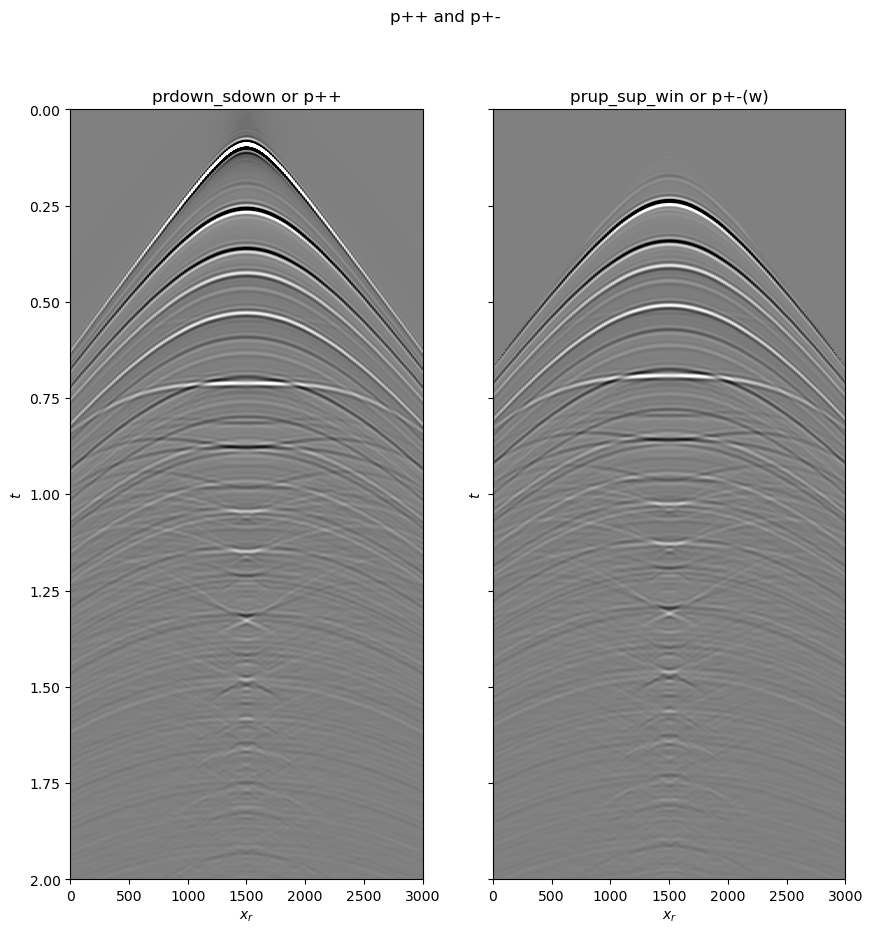

In [20]:
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(10, 10))
fig.suptitle('p++ and p+-')
axs[0].imshow(prdown_sdown[ns//2].T, cmap='gray', vmin=-0.1*np.abs(prdown_sdown+prup_sup).max(), 
              vmax=0.1*np.abs(prdown_sdown+prup_sup).max(), extent=(s[0,0], s[0,-1], t[-1], t[0]))
axs[0].set_title('prdown_sdown or p++'), axs[0].set_xlabel(r'$x_r$'), axs[0].set_ylabel(r'$t$')
axs[0].axis('tight')
axs[1].imshow(prup_sup_win[ns//2].T, cmap='gray', vmin=-0.1*np.abs(prdown_sdown+prup_sup).max(), 
              vmax=0.1*np.abs(prdown_sdown+prup_sup).max(), extent=(s[0,0], s[0,-1], t[-1], t[0]))
axs[1].set_title('prup_sup_win or p+-(w)'), axs[1].set_xlabel(r'$x_r$'), axs[1].set_ylabel(r'$t$')
axs[1].axis('tight')
axs[1].set_ylim(2,0);

In [21]:
np.savez_compressed('../dataset/inputdata_syncline',Pd=prdown_sdown,Puw=prup_sup_win,r=r,s=s,rho=rho,vel=vel,t=t,x=x,z=z,wav=wav)